# Введение в искусственные нейронные сети

# Часть 5. Рекуррентные нейронные сети

## Содержание:


<ol>
<li>Что такое Рекурретные нейронные сети</li>
<li>Архитектура Рекуррентных нейронных сетей</li>
<li>Пример на Keras рекуррентной нейронной сети</li>
</ol>

## Что такое Рекуррентные нейронные сети





Нейронные сети которые мы разбирали ранее относятся к классу feed forward нейронных сетей или сетей прямого распространения. Выходной сигнал слоя в этих нейронных сетях передавался напрямую в следующий слой. Однако есть задачи, в которых нам нужно обучать нейронную сеть не на единичных экземплярах наподобие изображений, а на наборах последовательностей, например последовательностей слов. 

<img src='images/rnn1.png'>

В рекуррентной нейронной сети выходной сигнал внутренних слоев циркулирует в этих слоях некоторое время. При обучении такой нейронной сети прежние выходные сигналы используются как дополнительные input'ы. Можно сказать, что эти дополнительные input'ы конкатенируются с "нормальными" input'ами предыдущего слоя.

Плюс рекуррентных нейронных сетей, или RNN, в том, что они обеспечивают последовательности с вариативными длинами как для входа, так и для вывода. Вот несколько примеров того, как может выглядеть рекуррентная нейронная сеть:

<img src='images/rnn2.jpg'>

*Входные данные отмечены красным, нейронная сеть RNN — зеленым, а вывод — синим.*

И несколько примеров задач:
<img src='images/rnn3.png'>

Реккурентные нейронные сети используются например для того, чтобы научить компьютерные системы "понимать" человеческих язык, для генерации текста.
Области использования:

- *Машинный перевод* выполняется при помощи нейронных сетей с принципом «многие ко многим». Оригинальная последовательность текста подается в рекуррентную нейронную сеть, которая затем создает переведенный текст в качестве результата вывода
- *Анализ настроений* часто выполняется при помощи рекуррентных нейронных сетей с принципом «многие к одному». Этот отзыв положительный или отрицательный?
- Разновидности реккуретных нейронных используются также для построения ИИ, подобных тем, что *обыграли человека* в компьютерную игру Dota 2

В отличие от сверточных нейронных сетей реккурентные нейронные сети как правило содержат небольшое количество слоев

## Архитектура Рекуррентных нейронных сетей


Несмотря на то, что RNN могут хорошо справляться со своими задачами они не могут работать с длинными последовательностями. Эффективно они могут работать только с последовательностями состоящими из 3-4 элементов. Для, к примеру, анализа текста отзывов на предмет того положительный это отзыв или нет этого будет недостаточно. Здесь может понадобиться анализ нескольких десятков слов, чтобы сделать корректный вывод.

<img src='images/arch1.jpg'>


Типичная классическая рекуррентная нейронная сеть использует только три набора параметров веса для выполнения требуемых подсчетов:

1. $W_{xh}$ используется для всех связок $x_t$ → $h_t$
2. $W_{hh}$ используется для всех связок $h_{t-1}$ → $h_t$
3. $W_{hy}$ используется для всех связок $h_t$ → $y_t$

$$h_t = tanh(W_{xh}x_t + W_{hh}h_{t-1})$$
$$y_t = W_{hy}h_t$$

<img src='images/arch2.png' width=500>

До этого в одном нейроне функция активации была:

$$h = tanh(Wx)$$
А теперь в нейроне с обратной связью:
$$h = tanh(W_{1}h + W_{2}x)$$

Вот так можно проиллюстрировать связи в нейронах RNN: 
<img src='images/arch3.png' width=500>

Выход каждого нейрона подключен ко входам всех нейронов.


In [ ]:
from keras.layers import SimpleRNN, LSTM, SimpleRNNCell
from keras.models import Sequential
import tensorflow as tf

In [ ]:
tf.random.set_seed(8)

model = Sequential([
            SimpleRNN(3, activation='sigmoid',
                      return_sequences=False,
                      input_shape=(10, 1))
        ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[-0.32960218, -0.39679444,  0.21676207]], dtype=float32),
 array([[ 0.84932506, -0.5089883 , -0.13991989],
        [ 0.07708611, -0.14263101,  0.98676956],
        [ 0.52221113,  0.8488741 ,  0.08190418]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [ ]:
# 0.6918393

In [ ]:
import numpy as np
np.random.seed(5)
x = np.random.randn(10).reshape((10, 1))
model.predict(x[None])

1/1 [==============================] - 0s 115ms/step


array([[0.7478643 , 0.55664617, 0.59053755]], dtype=float32)

### Реализация рекуррентной сети

Давайте попробуем сделать простую реккурентную нейронную сеть, которая будет учиться складывать числа. Для этих целей мы не будем пользоваться фреймворками для Deep Learning, чтобы посмотреть как она работает внутри.


In [ ]:
# впервую очередь подключим numpy и библиотеку copy, которая понадобиться, чтобы сделать deepcopy ряда элементов
import copy
import numpy as np
np.random.seed(0)


# вычислим сигмоиду
def sigmoid(x):
    output = 1 / (1 + np.exp(-x))
    return output

# конвертируем значение функции сигмоиды в ее производную. 
def sigmoid_deriv(output):
    return output * (1 - output)

In [ ]:
# генерация тренировочного датасета
int2binary = {}
binary_dim = 8

largest_number = pow(2, binary_dim)
binary = np.unpackbits(
    np.array([np.arange(largest_number, dtype=np.uint8)]).T,
    axis=1
)

for i in range(largest_number):
    int2binary[i] = binary[i]

display(binary, int2binary)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

{0: array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
 1: array([0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8),
 2: array([0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8),
 3: array([0, 0, 0, 0, 0, 0, 1, 1], dtype=uint8),
 4: array([0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8),
 5: array([0, 0, 0, 0, 0, 1, 0, 1], dtype=uint8),
 6: array([0, 0, 0, 0, 0, 1, 1, 0], dtype=uint8),
 7: array([0, 0, 0, 0, 0, 1, 1, 1], dtype=uint8),
 8: array([0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8),
 9: array([0, 0, 0, 0, 1, 0, 0, 1], dtype=uint8),
 10: array([0, 0, 0, 0, 1, 0, 1, 0], dtype=uint8),
 11: array([0, 0, 0, 0, 1, 0, 1, 1], dtype=uint8),
 12: array([0, 0, 0, 0, 1, 1, 0, 0], dtype=uint8),
 13: array([0, 0, 0, 0, 1, 1, 0, 1], dtype=uint8),
 14: array([0, 0, 0, 0, 1, 1, 1, 0], dtype=uint8),
 15: array([0, 0, 0, 0, 1, 1, 1, 1], dtype=uint8),
 16: array([0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8),
 17: array([0, 0, 0, 1, 0, 0, 0, 1], dtype=uint8),
 18: array([0, 0, 0, 1, 0, 0, 1, 0], dtype=uint8),
 19: array([0, 0, 0, 1, 0, 0, 1, 1], dtyp

Сначала рассмотрим всё по отдельности.

In [ ]:
# входные переменные
learning_rate = 1
input_dim = 2
hidden_dim = 16
output_dim = 1


# инициализация весов нейронной сети
weigths_0 = np.random.random((input_dim, hidden_dim))
weigths_1 = np.random.random((hidden_dim, output_dim))
weigths_h = np.random.random((hidden_dim, hidden_dim))

weigths_0_update = np.zeros_like(weigths_0)
weigths_1_update = np.zeros_like(weigths_1)
weigths_h_update = np.zeros_like(weigths_h)

Берем случайный объект для обучения.

In [ ]:
# генерация простой проблемы сложения (a + b = true)
a_int = np.random.randint(largest_number / 2) # int version
a = int2binary[a_int] # бинарное кодирование

b_int = np.random.randint(largest_number / 2) # int version
b = int2binary[b_int] # бинарное кодирование

# правильный ответ
true_int = a_int + b_int
true = int2binary[true_int]

# место где мы располагаем наши лучше результаты (бинарно закодированные)
pred = np.zeros_like(true)

overallError = 0

output_grads = []
h_values = []
h_values.append(np.zeros(hidden_dim))
print('a   ', a)
print('b   ', b)
print('true', true)

a    [0 0 0 0 1 0 0 1]
b    [0 0 1 1 1 1 0 0]
true [0 1 0 0 0 1 0 1]


<img src='images/arch1.jpg'>


$$h_t = \sigma(W_{xh}x_t + W_{hh}h_{t-1} + b_h)$$
$$y_t = W_{hy}h_t + b_y$$

Рассмотрим Forward pass.

In [ ]:
# FORWARD
print('a   ', a)
print('b   ', b)
print('true', true)
for position in range(binary_dim):
    
    # генерация input и output
    X = np.array([[a[binary_dim - position - 1], 
                   b[binary_dim - position - 1]]])
    print('X', X)
    y = np.array([[true[binary_dim - position - 1]]]).T
    print('y', y)
    
    print('h', h_values[-1])
    # внутренний слой (input + предыдущий внутренний)
    h = sigmoid(
        np.dot(X, weigths_0) + np.dot(h_values[-1], weigths_h)
    )
    print(h.shape)
    # output layer (новое бинарное представление)
    output = sigmoid(
        np.dot(h, weigths_1)
    )
    print('output', output)
    # проверка упустили ли мы что-то и если да, то как много 
    output_error = output - y
    print('output_error', output_error)

    output_grads.append(
        output_error * sigmoid_deriv(output)
    )

    # декодируем оценку
    pred[binary_dim - position - 1] = np.round(output[0][0])
    
    # сохраняем внутренний слой,
    # чтобы могли его использовать в след. итерации
    h_values.append(copy.deepcopy(h))
    print('=' * 32)

a    [0 0 0 0 1 0 0 1]
b    [0 0 1 1 1 1 0 0]
true [0 1 0 0 0 1 0 1]
X [[1 0]]
y [[1]]
h [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(1, 16)
output [[0.99347749]]
output_error [[-0.00652251]]
X [[0 0]]
y [[0]]
h [[0.63386027 0.6715468  0.64628827 0.63294764 0.60435748 0.65608461
  0.60768396 0.70925592 0.72385455 0.59470289 0.68820161 0.62922533
  0.63831185 0.71618109 0.51775155 0.52176856]]
(1, 16)
output [[0.99953702]]
output_error [[0.99953702]]
X [[0 1]]
y [[1]]
h [[0.99315525 0.99650619 0.99824672 0.98099711 0.99862104 0.98677456
  0.98507713 0.994029   0.9945905  0.99653362 0.99466009 0.99395418
  0.98778101 0.99050618 0.99455284 0.98371131]]
(1, 16)
output [[0.99956667]]
output_error [[-0.00043333]]
X [[1 1]]
y [[0]]
h [[0.99956192 0.99993906 0.99997081 0.99920254 0.99998876 0.99948335
  0.99917311 0.99984328 0.99966581 0.99993042 0.99977123 0.99986292
  0.99940046 0.99953657 0.99976708 0.99914108]]
(1, 16)
output [[0.9995673]]
output_error [[0.9995673]]
X [[0 1]]
y [[0]]

Рассмотрим Backward pass.

<img src='images/arch1.jpg'>

$$h_t = \sigma(W_{xh}x_t + W_{hh}h_{t-1} + b_h)$$
$$y_t = W_{hy}h_t + b_y$$

In [ ]:
future_h_grad = np.zeros(hidden_dim)

print('a   ', a)
print('b   ', b)
print('true', true)
print('pred', pred)

# BACKWARD
for position in range(binary_dim):
    
    X = np.array([[a[position], b[position]]])
    print('X', X)
    h = h_values[-position - 1]
    prev_h = h_values[-position - 2]
    
    # величина ошибки в output layer
    output_grad = output_grads[-position - 1]

    # величина ошибки в hidden layer
    h_grad = (
        future_h_grad.dot(weigths_h.T) \
        + output_grad.dot(weigths_1.T) \
    ) * sigmoid_deriv(h)

    # обновление всех весов
    weigths_1_update += np.atleast_2d(h).T @ output_grad
    weigths_h_update += np.atleast_2d(prev_h).T @ h_grad
    weigths_0_update += X.T @ h_grad
    
    future_h_grad = h_grad.copy()


weigths_0 -= weigths_0_update * learning_rate
weigths_1 -= weigths_1_update * learning_rate
weigths_h -= weigths_h_update * learning_rate    

a    [0 0 0 0 1 0 0 1]
b    [0 0 1 1 1 1 0 0]
true [0 1 0 0 0 1 0 1]
pred [1 1 1 1 1 1 1 1]
X [[0 0]]
X [[0 0]]
X [[0 1]]
X [[0 1]]
X [[1 1]]
X [[0 1]]
X [[0 0]]
X [[1 0]]


Все вместе.

In [ ]:
# входные переменные
learning_rate = 1
input_dim = 2
hidden_dim = 16
output_dim = 1


# инициализация весов нейронной сети
weigths_0 = np.random.random((input_dim, hidden_dim))
weigths_1 = np.random.random((hidden_dim, output_dim))
weigths_h = np.random.random((hidden_dim, hidden_dim))

weigths_0_update = np.zeros_like(weigths_0)
weigths_1_update = np.zeros_like(weigths_1)
weigths_h_update = np.zeros_like(weigths_h)


# тренировочная логика
for j in range(10000):
    
    # генерация простой проблемы сложения (a + b = true)
    a_int = np.random.randint(largest_number / 2) # int version
    a = int2binary[a_int] # бинарное кодирование

    b_int = np.random.randint(largest_number / 2) # int version
    b = int2binary[b_int] # бинарное кодирование

    # правильный ответ
    true_int = a_int + b_int
    true = int2binary[true_int]
    
    # место где мы располагаем наши лучше результаты (бинарно закодированные)
    pred = np.zeros_like(true)

    overallError = 0
    
    output_grads = []
    h_values = []
    h_values.append(np.zeros(hidden_dim))
    
    # FORWARD
    for position in range(binary_dim):
        
        # генерация input и output
        X = np.array([[a[binary_dim - position - 1], 
                       b[binary_dim - position - 1]]])
    
        y = np.array([[true[binary_dim - position - 1]]]).T
      
        # внутренний слой (input + предыдущий внутренний)
        h = sigmoid(
            np.dot(X, weigths_0) + np.dot(h_values[-1], weigths_h)
        )

        # output layer (новое бинарное представление)
        output = sigmoid(
            np.dot(h, weigths_1)
        )
        
        # проверка упустили ли мы что-то и если да, то как много 
        output_error = output - y
        output_grads.append(
            output_error * sigmoid_deriv(output)
        )
        overallError += np.abs(output_error[0])
    
        # декодируем оценку
        pred[binary_dim - position - 1] = np.round(output[0][0])
        
        # сохраняем внутренний слой,
        # чтобы могли его использовать в след. итерации
        h_values.append(copy.deepcopy(h))
    
    future_h_grad = np.zeros(hidden_dim)
    
    # BACKWARD
    for position in range(binary_dim):
        
        X = np.array([[a[position], b[position]]])
        
        h = h_values[-position - 1]
        prev_h = h_values[-position - 2]
        
        # величина ошибки в output layer
        output_grad = output_grads[-position - 1]

        # величина ошибки в hidden layer
        h_grad = (
            future_h_grad.dot(weigths_h.T) \
            + output_grad.dot(weigths_1.T) \
        ) * sigmoid_deriv(h)

        weigths_1_update += np.atleast_2d(h).T @ output_grad
        weigths_h_update += np.atleast_2d(prev_h).T @ h_grad
        weigths_0_update += X.T @ h_grad
        
        future_h_grad = h_grad.copy()
    

    weigths_0 -= weigths_0_update * learning_rate
    weigths_1 -= weigths_1_update * learning_rate
    weigths_h -= weigths_h_update * learning_rate    

    weigths_0_update *= 0
    weigths_1_update *= 0
    weigths_h_update *= 0
    
    # вывод на экран процесса обучения
    if (j % 1000 == 0):
        print(f"Error: {overallError}")
        print(f"Pred: {pred}")
        print(f"True: {true}")
        out = 0
        for index, x in enumerate(reversed(pred)):
            out += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out))
        print("------------")

Error: [1.99600086]
Pred: [1 1 1 1 1 1 1 1]
True: [1 0 1 1 1 1 1 0]
123 + 67 = 255
------------
Error: [2.43387483]
Pred: [0 0 0 0 0 0 0 0]
True: [0 1 0 1 0 0 0 0]
38 + 42 = 0
------------
Error: [2.12270501]
Pred: [1 1 1 1 1 1 1 1]
True: [1 0 0 1 1 1 1 1]
37 + 122 = 255
------------
Error: [3.53591294]
Pred: [1 0 0 0 0 0 1 1]
True: [1 0 1 1 1 0 1 0]
124 + 62 = 131
------------
Error: [0.19332125]
Pred: [0 1 1 0 1 1 0 0]
True: [0 1 1 0 1 1 0 0]
0 + 108 = 108
------------
Error: [0.08303137]
Pred: [1 0 0 0 1 1 0 0]
True: [1 0 0 0 1 1 0 0]
76 + 64 = 140
------------
Error: [0.36374014]
Pred: [0 0 1 0 1 1 1 1]
True: [0 0 1 0 1 1 1 1]
47 + 0 = 47
------------
Error: [0.14596281]
Pred: [0 0 0 0 1 0 1 1]
True: [0 0 0 0 1 0 1 1]
1 + 10 = 11
------------
Error: [0.12788186]
Pred: [1 1 0 0 0 0 1 0]
True: [1 1 0 0 0 0 1 0]
74 + 120 = 194
------------
Error: [0.10058878]
Pred: [0 1 0 0 1 0 1 0]
True: [0 1 0 0 1 0 1 0]
52 + 22 = 74
------------


Еще раз посмотрим на примеры задач и с помощью каких архитектур это можно сделать.

Задача многие к одному:

<img src='images/ex1.png' width=650>

Задача один ко многим:

<img src='images/ex2.png' width=650>

Задача многие ко многим:

<img src='images/ex3.png' width=650>

Здесь можно заметить проблему, что предложения могут быть очень длинными, а нужно сжать всю информацию о предыдущих словах в один блок, который представляет собой внутренний слой - переходное состояние из кодировщика в декодировщика.


## Vanishing gradient problem

Хотелось бы обрабатывать длинные последовательности текста и так же учитывать побольше контекста из предыдущих слов. (В конце предложении хорошо бы вспомнить, что происходило в начале предложения.)

Из материалов по сверточным нейронным сетям нам известна проблема исчезающего градиента. В случае с большим количеством слоев значение градиента при последовательном обновлении большого количества слоев становится все меньше и может стать настолько маленьким, что не сможет в принципе существенно изменить поведение нейронов. В рекуррентных нейронных сетях из-за сигнала циркулирующего внутри слоев это проблема становится еще острее. Причем градиент может стать не только очень маленьким, но и очень большим.

## Long Short Term Memory (LSTM)

Решить проблему исчезающего градиента призвана разновидность RNN под названием LSTM.

**Long short-term memory (LSTM) юниты** - это блоки, из которых состоят слои одной из разновидностей рекуррентной нейронной сети (RNN). Обычно LSTM юнит представляет из себя ячейку состоящую из input gate, output gate и forget gate. Эти ячейки отвественны за запоминания значений на определенные промежутки времени. RNN, состоящая из LSTM юнитов иногда называется просто LSTM. 

<img src='images/lstm.png' width=700>


Здесь не просто распространяется сигнал, но и происходит управление размером влияния того, что приходит из предыдущего состояния. Каждый из этих элементов можно представить как типичный искусственный нейрон, который вычисляет активацию как взвешенную сумму. Их работа сводится к регуляции потока значений через блок LSTM, поэтому они и называются ворота или затворы (gate). Задача gate'ов - открыть пошире двери или закрыть её. Есть три gate:
1. Input gate - gate входного сигнала обеспечивает возможность меньше влиять предыдущему состоянию на текущее состояние
2. Output gate - gate выходного сигнала
3. Forget gate - gate забывания управляет очисткой памяти, скоростью забывания предыдущего состояния. Хранить эту информацию данная ячейка может очень долго.


Из-за этих настраиваемых параметров, LSTM более сложная модель по сравнению с RNN. Значит она требует больше времени, больше примеров.

Понятие долгой памяти в названии возникло из-за того, что они могут запоминать информацию на более длинный период времени, чем обычная RNN. LSTM хорошо подходит для классификации процессов и предсказания временных последовательностей неизвестного размера и неизвестных промежутков между важными событиями. С технической точки зрения это достигается за счет ликвидации проблем связанных с exploding и vanishing gradient'ами. Ошибки сохраняются в самом слое, что позволяет передавать градиенты в следующие слои практически без потерь.

### Компоненты LSTM.  
Ниже приведен список компонентов из которых состоит ячейка LSTM:

Ключевой момент в LSTM - это **состояние ячейки** - горизонтальная линия сверху диаграммы. Сигнал протекает из ячейки в ячейку с небольшими линейными преобразования.

<img src='images/lstm_state.png'>

У LSTM есть способность удалять или добавлять информацию в состояние ячейки с помощью gate'ов.

Гейты пропускают информацию по возможности. Они состоят из сигмоиды и перемножения матриц. Выход с сигмоиды от 0 до 1 описывает с какой силой сигнал может пройти дальше. Значения 0 значит "ничего не пройдет", а 1 - "пропускай всё".

У LSTM есть три гейта, чтобы сохранять и контролировать состояние ячейки.

**Forget gate**

Первый шаг в LSTM - это решить, от какой информации мы хотим избавиться. Это решение принимает слой с сигмоидой, который называется "forget gate layer." (гейт забывания). Он принимает во внимание $h_{t−1}$ и $x_t$, а на выходе даёт значение между 0 и 1 для каждого числа в состоянии ячейки $C_{t−1}$. 1 значит "полностью сохрани это", а 0 - "полностью забудь это".

Пример забывания - языковая модель пытается предсказать следующее слово базируясь на предыдущих. Здесь модель может запоминать род объекта, чтобы использовать правильное образование слов. Когда мы видим новый объект, то нужно забыть род предыдущего объекта. *(Животное не переходило дорогу, потому что оно устало)*

<img src='images/f_gate.png'>

**Input gate**

Следующий шаг - решить, какую информацию мы должны хранить в состоянии ячейки. Шаг состоит из двух частей. Первая - слой сигмоиды, называемый "input gate layer" (входной гейт), который решает какие значения будут обновляться. Вторая - слой с тангенсом, который создает вектор значений $\tilde{C}_t$, которые будут добавляться к состоянию ячейки.

С примером языковой модели, мы бы хотели добавлять род нового объекта в состояние ячейки, чтобы заменить старый род, который мы забудем. *(Животное не переходило дорогу, потому что оно устало)*

<img src='images/i_gate.png'>

**Update cell state**

Сейчас самое время, чтобы обновить старое состояние $C_{t−1}$ в новое состояние $C_t$. Предыдущие шаги уже решили, что делать, нужно только сделать это.

Умножаем старое состояние на $f_t$, тем самым забывая те вещи, которые хотели забыть, затем прибавляем $i_t∗\tilde{C_t}$. Это новое значение состояния ячейки, которое отмасштабировано в зависимоcти от того, насколько мы хотим обновить новое значение.

В языковой модели, это момент, где мы выкидываем информацию о роде старого объекта и добавляем новую информацию о роде нового объекта. *(Животное не переходило дорогу, потому что оно устало)*


<img src='images/update_cell_state.png'>

**Output gate**

Наконец-то нам нужно решить, что мы отправим на выход. Выход будет базироваться на состоянии ячейки, но с небольшой фильтрацией. Во-первых, прогоним входной сигнал через сигмоиду, которая решает с какой силой дальше пропускать сигнал, во-вторых, прогоняем состояние ячейки через тангенс и умножаем это на сигмоиду, чтобы пропускать дальше только то, что мы решили пропустить.

Для языковой модели, которая видит только объект, здесь можем пропустить информацию, связанную с глаголом. Например, на выходе может быть полезно число множественной или единственное у объекта, чтобы знать в какую форму нужно поставить глагол. *(Животное не переходило дорогу, потому что оно устало)*

<img src='images/o_gate.png'>

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

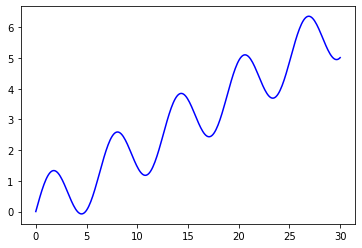

In [ ]:
N = 300
t = np.linspace(0, 30, N).reshape((N, 1))
x_t = np.sin(t) + t * 0.2

x_len = 7  # длина истории
n = 2  # длина вектора данных

plt.plot(t, x_t, '-b');

In [ ]:
input = Input(shape=(x_len, 2))
output = LSTM(units=128, dropout=0.0)(input)
output = Dense(1, activation='linear')(output)

model = Model(input, output)
model.compile(optimizer='Adam',
              loss='mse',
              metrics=['mse'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 2)]            0         
                                                                 
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 67,201
Trainable params: 67,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X = []
y = []

for i in range(N - x_len - 1):
    X.append(np.concatenate(
                (t[i: x_len + i], x_t[i: x_len + i])
        ).reshape((2, x_len)).T
    )
    y.append(x_t[i + x_len])

X = np.array(X)
y = np.array(y)

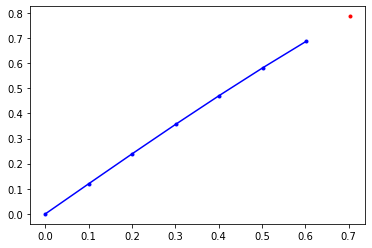

In [ ]:
plt.plot(X[0][:, 0], X[0][:, 1], '.-b')
plt.plot(t[x_len], y[0], '.r');

In [ ]:
%%time
test_n = 200
model.fit(X[:test_n], y[:test_n],
          epochs=20,
          validation_data=(X[test_n:], y[test_n:])
          )

Epoch 1/20
7/7 [==============================] - 5s 79ms/step - loss: 5.7271 - mse: 5.7271 - val_loss: 15.8870 - val_mse: 15.8870
Epoch 2/20
7/7 [==============================] - 0s 8ms/step - loss: 1.5474 - mse: 1.5474 - val_loss: 6.7048 - val_mse: 6.7048
Epoch 3/20
7/7 [==============================] - 0s 8ms/step - loss: 1.4215 - mse: 1.4215 - val_loss: 5.2635 - val_mse: 5.2635
Epoch 4/20
7/7 [==============================] - 0s 8ms/step - loss: 0.7541 - mse: 0.7541 - val_loss: 5.6836 - val_mse: 5.6836
Epoch 5/20
7/7 [==============================] - 0s 8ms/step - loss: 0.6108 - mse: 0.6108 - val_loss: 4.3453 - val_mse: 4.3453
Epoch 6/20
7/7 [==============================] - 0s 9ms/step - loss: 0.4500 - mse: 0.4500 - val_loss: 2.7560 - val_mse: 2.7560
Epoch 7/20
7/7 [==============================] - 0s 8ms/step - loss: 0.3566 - mse: 0.3566 - val_loss: 2.0671 - val_mse: 2.0671
Epoch 8/20
7/7 [==============================] - 0s 8ms/step - loss: 0.2869 - mse: 0.2869 - val_loss

In [ ]:
model.evaluate(X[:test_n], y[:test_n])

7/7 [==============================] - 0s 3ms/step - loss: 0.0538 - mse: 0.0538


[0.0538252554833889, 0.0538252554833889]

7/7 [==============================] - 0s 2ms/step


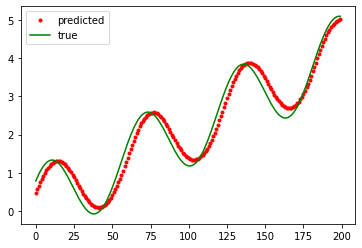

In [ ]:
y_pred = model.predict(X[:test_n])

plt.plot(y_pred, '.r', label='predicted')
plt.plot(y[:test_n], 'g', label='true')
plt.legend();

3/3 [==============================] - 0s 4ms/step


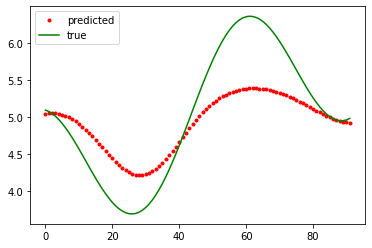

In [ ]:
y_pred = model.predict(X[test_n:])

plt.plot(y_pred, '.r', label='predicted')
plt.plot(y[test_n:], 'g', label='true')
plt.legend();

## Gated Recurrent Unit (GRU)

Теперь, когда мы знаем как работает LSTM, давайте бегло взглянем на то, как работате GRU. GRU это более новое поколение рекуррентных нейронных сетей и оно во многом похоже на LSTM. Но есть определенная разница. В GRU не используется состояние ячейки и используется скрытое состояние для передачи информации. В GRU также есть два затвора - reset gate и update gate.

<img src='images/gru1.png' width=700>

Update Gate обновляет затворы действуя подобно forget и input gate, которые используются в LSTM. Он решает какая информация будет отброшена, а какая новая информация будет добавлена. Reset Gate - это другой затвор, использующийся для принятия решения, как много прошлой информации будет забыто. В этих особенностях и заключается архитектура GRU. GRU имеет меньше тензорных операций и соответственно тренеруется быстре, чем LSTM. Однако нельзя сказать точно, какая архитектура лучше. Исследователи и инженеры пытаются определить, что в каждом конкретном случае подойдет больше. Если говорить упрощенно, то GRU может подойти тогда, когда важнее скорость, чем точность, а LSTM тогда, когда важнее точность, чем скорость. 

<img src='images/gru2.png'>

<img src='images/gru3.png' width=400>

In [ ]:
from tensorflow.keras.layers import GRU


input = Input(shape=(x_len, 2))
output = GRU(units=128, dropout=0.0)(input)
output = Dense(1, activation='linear')(output)

model = Model(input, output)
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 7, 2)]            0         
                                                                 
 gru (GRU)                   (None, 128)               50688     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50,817
Trainable params: 50,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
test_n = 200
model.fit(X[:test_n], y[:test_n],
          epochs=20,
          validation_data=(X[test_n:], y[test_n:])
          )

Epoch 1/20
7/7 [==============================] - 2s 68ms/step - loss: 6.9006 - mse: 6.9006 - val_loss: 10.0925 - val_mse: 10.0925
Epoch 2/20
7/7 [==============================] - 0s 8ms/step - loss: 1.3182 - mse: 1.3182 - val_loss: 2.4095 - val_mse: 2.4095
Epoch 3/20
7/7 [==============================] - 0s 9ms/step - loss: 1.5304 - mse: 1.5304 - val_loss: 2.6036 - val_mse: 2.6036
Epoch 4/20
7/7 [==============================] - 0s 8ms/step - loss: 0.6447 - mse: 0.6447 - val_loss: 3.4826 - val_mse: 3.4826
Epoch 5/20
7/7 [==============================] - 0s 8ms/step - loss: 0.5711 - mse: 0.5711 - val_loss: 2.6810 - val_mse: 2.6810
Epoch 6/20
7/7 [==============================] - 0s 7ms/step - loss: 0.4518 - mse: 0.4518 - val_loss: 1.5742 - val_mse: 1.5742
Epoch 7/20
7/7 [==============================] - 0s 7ms/step - loss: 0.3743 - mse: 0.3743 - val_loss: 1.0876 - val_mse: 1.0876
Epoch 8/20
7/7 [==============================] - 0s 8ms/step - loss: 0.3551 - mse: 0.3551 - val_loss

In [ ]:
model.evaluate(X[:test_n], y[:test_n])

7/7 [==============================] - 0s 3ms/step - loss: 0.0509 - mse: 0.0509


[0.05089771747589111, 0.05089771747589111]

7/7 [==============================] - 0s 3ms/step


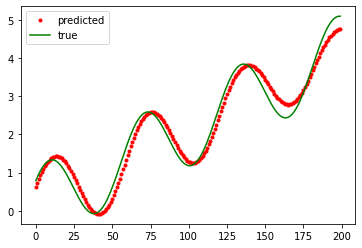

In [ ]:
y_pred = model.predict(X[:test_n])

plt.plot(y_pred, '.r', label='predicted')
plt.plot(y[:test_n], 'g', label='true')
plt.legend();

3/3 [==============================] - 0s 4ms/step


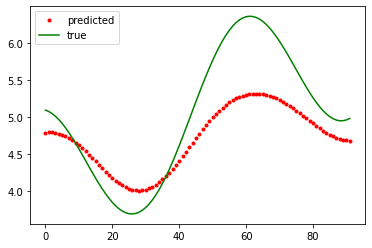

In [ ]:
y_pred = model.predict(X[test_n:])

plt.plot(y_pred, '.r', label='predicted')
plt.plot(y[test_n:], 'g', label='true')
plt.legend();

## Attention

С какими проблемами еще можем столкнуться? Снова поговорим про машинный перевод.

Примеры из статьи [Google's Neural Machine Translation System: Bridging the Gap between Human and Machine Translation](https://arxiv.org/abs/1609.08144).

<!-- <img src='https://drive.google.com/uc?export=view&id=1uOHQX8AnPGKY6HEDOTRJzVxCiKAHLoJy' width=450> -->
<img src='images/attention1.png' width=450>

Нужно сжать всю информацию о предыдущих словах в один блок, который представляет собой внутренний слой - переходное состояние из кодировщика в декодировщика, что очень сложная задача, которая приводит к недообучению.

И одно из возможных решений - это настакать слои LSTM, один слой LSTM создает вход для другого слоя LSTM:

<!-- <img src='https://drive.google.com/uc?export=view&id=1yrBxb5DXZA-LNwNWQdmuF4TNNXqTfNpJ' width=450> -->
<img src='images/attention2.png' width=450>

Но эту вещь очень тяжело обучать, если добавлять всё больше LSTM слоем, то снова встречаемся с проблемой затухающих градиентов, плюсом, всё равно нужно сжимать всю информацию в последние блоки - это наш bottleneck (узкое место, горлышко бутылки) между кодировщик и декодировщиком.


И решение этой проблемы - Attention слой. Вместо того, чтобы сжимать всю информацию из всех временных ячеек в одно скрытое состояние, можно дать доступ декодировщику ко всей истории. Но получаем очень слишком много информации, которую нужно учитывать, поэтому мы будем обращать свое внимание только на подвыборку этих ячеек.

Будем учитывать, какая часть предложения на английском языке важна для предсказания слова на французском языке. Подсчет такого распределения достигается получением оценки релевантности каждого слова в предложении для получения нового слова.

<!-- <img src='https://drive.google.com/uc?export=view&id=1GAVWyShMSXELaz1f-_e4c9rAeDoJ3QE_' width=450> -->
<img src='images/attention3.png' width=450>

**Как использовать эти оценки релевантности?**

Подсчитываются оценки для каждого скрытого состояния и образуют собой взвешанную сумму внимания. А потом эта сумма передается, как еще один вход в декодировщик.

<!-- <img src='https://drive.google.com/uc?export=view&id=1a72Ake6Ai2SdkZ9cQpqmq6-ebjblcQ34' width=450> -->
<img src='images/rel1.png' width=450>

Можно [провизуализировать](https://distill.pub/2016/augmented-rnns/#attentional-interfaces), какое внимание уделяется каждому слову из предложения:

<!-- <img src='https://drive.google.com/uc?export=view&id=1WcRiqQ5fG7kQPTbISHgRYYwbBbLetDOL' width=800> -->
<img src='images/rel2.png' width=800>

А ещё слои внимания можно добавлять и не только к текстам, но и к картинкам.

<!-- <img src='https://drive.google.com/uc?export=view&id=1i48NmZMXUneeUwW339tSgvrGU_VvLh9H'> -->
<img src='images/rel3.png'>


## Bidirectional LSTM

https://keras.io/examples/nlp/bidirectional_lstm_imdb/

Еще одна проблема с LSTM - они учитывают только контекст до слова. Почему это может быть плохо? К примеру, слово "quick" может значит очень много вещей и смысл слова будет понятен только после прочтения слов, которые идут после него.

Идея решения проблемы - использовать LSTM слой для прямого контекста и еще слой LSTM для обратного контекста - это будет двунаправленный слой LSTM (Bidirectional LSTM).



<!-- <img src='https://drive.google.com/uc?export=view&id=1kCGsUWhUjIoIAquvE7FjaAbYjAQdsyW7' width=550> -->
<img src='images/bilstm1.png' width=550>

А так будет выглядеть сеть, если всё объединить вместе.

<!-- <img src='https://drive.google.com/uc?export=view&id=1FdhBWJFQKEpM8lUZ-E2hlTWCmNj361Lg' width=450> -->
<img src='images/bilstm2.png' width=450>



## Практика

### IMDB

Теперь давайте попробуем с помощью Keras построить LSTM нейронную сеть для оценки настроений отзывов на IMDB.

Данный датасет слишком мал, чтобы преимущества LSTM проявились, однако в учебных целях он подойдет.

В тренировке рекуррентных нейронных сетей важную роль играет размер batch, но еще большую роль играет выбор функций loss и optimizer.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 10000

# обрезаем тексты после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 80
batch_size = 50 # увеличьте значение для ускорения обучения

print('Загрузка данных...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

Загрузка данных...


In [ ]:
[len(i) for i in X_train[:5]]

[218, 189, 141, 550, 147]

In [ ]:
X_train[:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
index2word = {v:k for k, v in imdb.get_word_index().items()}

for idx_word in X_train[0]:
    print(index2word[idx_word], end=' ')

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

In [ ]:
print('Pad последовательности (примеров в x единицу времени)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad последовательности (примеров в x единицу времени)
X_train shape: (25000, 80)
X_test shape: (25000, 80)


In [ ]:
X_train[0]

array([  15,  256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,
        530,  476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,
        104,   88,    4,  381,   15,  297,   98,   32, 2071,   56,   26,
        141,    6,  194, 7486,   18,    4,  226,   22,   21,  134,  476,
         26,  480,    5,  144,   30, 5535,   18,   51,   36,   28,  224,
         92,   25,  104,    4,  226,   65,   16,   38, 1334,   88,   12,
         16,  283,    5,   16, 4472,  113,  103,   32,   15,   16, 5345,
         19,  178,   32], dtype=int32)

In [ ]:
X_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,  591,  202,   14,   31,    6,  717,   10,   10,    2,
          2,    5,    4,  360,    7,    4,  177, 5760,  394,  354,    4,
        123,    9, 1035, 1035, 1035,   10,   10,   13,   92,  124,   89,
        488, 7944,  100,   28, 1668,   14,   31,   23,   27, 7479,   29,
        220,  468,    8,  124,   14,  286,  170,    8,  157,   46,    5,
         27,  239,   16,  179,    2,   38,   32,   25, 7944,  451,  202,
         14,    6,  717], dtype=int32)

In [ ]:
index = imdb.get_word_index()
len(index)

88584

In [ ]:
np.max(X_train)

9999

In [ ]:
max_features

10000

"Мешок слов" - Bag of Word (BoW) 

http://lab314.brsu.by/kmp-lite/kmp2/JOB/CModel/BoW-Q.htm





In [ ]:
X_train[0]

array([  15,  256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,
        530,  476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,
        104,   88,    4,  381,   15,  297,   98,   32, 2071,   56,   26,
        141,    6,  194, 7486,   18,    4,  226,   22,   21,  134,  476,
         26,  480,    5,  144,   30, 5535,   18,   51,   36,   28,  224,
         92,   25,  104,    4,  226,   65,   16,   38, 1334,   88,   12,
         16,  283,    5,   16, 4472,  113,  103,   32,   15,   16, 5345,
         19,  178,   32], dtype=int32)

In [ ]:
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
 
X_train_bow = vectorize(X_train, dimension=max_features)
X_test_bow = vectorize(X_test, dimension=max_features)

In [ ]:
X_train_bow.shape

(25000, 10000)

In [ ]:
X_train_bow[0, :10]

array([0., 0., 1., 0., 1., 1., 1., 1., 0., 0.])

In [ ]:
print('Построение модели...')
model_bow = Sequential()

model_bow.add(Dense(128, activation='relu', input_shape=(max_features, )))
model_bow.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимизаторы и другие конфигурации
model_bow.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
model_bow.summary()

Построение модели...
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1280128   
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,257
Trainable params: 1,280,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('Процесс обучения...')
model_bow.fit(X_train_bow[:], y_train[:],
              batch_size=batch_size,
              epochs=3,
              validation_data=(X_test_bow, y_test))

Процесс обучения...
Epoch 1/3
500/500 [==============================] - 4s 8ms/step - loss: 0.4017 - accuracy: 0.8155 - val_loss: 0.3655 - val_accuracy: 0.8364
Epoch 2/3
500/500 [==============================] - 3s 5ms/step - loss: 0.2555 - accuracy: 0.8955 - val_loss: 0.3973 - val_accuracy: 0.8251
Epoch 3/3
500/500 [==============================] - 3s 6ms/step - loss: 0.1722 - accuracy: 0.9326 - val_loss: 0.4777 - val_accuracy: 0.8201


In [ ]:
print('Валидация модели')
score, acc = model_bow.evaluate(X_test_bow, y_test, batch_size=batch_size)

Валидация модели
500/500 [==============================] - 1s 3ms/step - loss: 0.4777 - accuracy: 0.8201


Обучение на последовательности

In [ ]:
def vectorize_seq(sequences, xLen=100):
    results = np.zeros((len(sequences), xLen, 1))
    for i, sequence in enumerate(sequences):
        for j in range(xLen):
            results[i, j,:] = sequence[j]
    return results
 
X_train_seq = vectorize_seq(X_train, xLen=maxlen)
X_test_seq = vectorize_seq(X_test, xLen=maxlen)

In [ ]:
X_test.shape, X_test_seq.shape

((25000, 80), (25000, 80, 1))

In [ ]:
display(X_train[0, :10], X_train_seq[0, :10])

array([  15,  256,    4,    2,    7, 3766,    5,  723,   36,   71],
      dtype=int32)

array([[1.500e+01],
       [2.560e+02],
       [4.000e+00],
       [2.000e+00],
       [7.000e+00],
       [3.766e+03],
       [5.000e+00],
       [7.230e+02],
       [3.600e+01],
       [7.100e+01]])

In [ ]:
print('Построение модели...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, 1)))
model.add(Dense(1, activation='sigmoid'))

# стоит попробовать использовать другие оптимизаторы и другие конфигурации
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Построение модели...
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 128)               66560     
                                                                 
 dense_16 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('Процесс обучения...')
model.fit(X_train_seq, y_train,
          batch_size=1000,
          epochs=5,
          validation_data=(X_test_seq, y_test))

Процесс обучения...
Epoch 1/5
25/25 [==============================] - 3s 72ms/step - loss: 0.6963 - accuracy: 0.5129 - val_loss: 0.6919 - val_accuracy: 0.5246
Epoch 2/5
25/25 [==============================] - 1s 34ms/step - loss: 0.6900 - accuracy: 0.5333 - val_loss: 0.6892 - val_accuracy: 0.5359
Epoch 3/5
25/25 [==============================] - 1s 34ms/step - loss: 0.6862 - accuracy: 0.5463 - val_loss: 0.6844 - val_accuracy: 0.5532
Epoch 4/5
25/25 [==============================] - 1s 29ms/step - loss: 0.6844 - accuracy: 0.5560 - val_loss: 0.6842 - val_accuracy: 0.5538
Epoch 5/5
25/25 [==============================] - 1s 34ms/step - loss: 0.6831 - accuracy: 0.5589 - val_loss: 0.6830 - val_accuracy: 0.5570


In [ ]:
print('Валидация модели')
score, acc = model.evaluate(X_test_seq, y_test, batch_size=batch_size)

Валидация модели
500/500 [==============================] - 3s 5ms/step - loss: 0.6830 - accuracy: 0.5570


Сеть обучилась не очень хорошо, можно сделать её посложнее или просто пообучать подольше, но на самом деле так не делают, передавать индексы слов не самая лучшая затея. Это решается по-другому, с помощью **эмбеддингов**.

**Эмбэддинг - векторное представление слов.**

<!-- <img src='https://drive.google.com/uc?export=view&id=13DNqtvToTyJritI3oRbyanrnTo1I-H60'> -->
<img src='images/embedding.png'>

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128))

In [ ]:
model.predict(X_train[:1])

1/1 [==============================] - 0s 112ms/step


array([[[-0.0459896 , -0.02829106,  0.00875155, ...,  0.01925715,
         -0.0198624 , -0.04819277],
        [ 0.01905606, -0.03895915, -0.00296197, ...,  0.03643168,
         -0.04094205, -0.03865347],
        [ 0.01836314,  0.01272709,  0.0295775 , ..., -0.00967499,
         -0.00779078,  0.0493308 ],
        ...,
        [ 0.04818854,  0.00422738, -0.0090765 , ...,  0.03554029,
         -0.02746317, -0.03679756],
        [ 0.04751227,  0.03957209, -0.00309707, ...,  0.00604331,
          0.03852249,  0.03015116],
        [ 0.02436737,  0.04087094,  0.01339928, ...,  0.03511328,
          0.01468431, -0.04836633]]], dtype=float32)

In [ ]:
model.predict(X_train[:1]).shape

1/1 [==============================] - 0s 26ms/step


(1, 80, 128)

In [ ]:
print('Построение модели...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Dropout(0.3))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Построение модели...
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 128)         1280000   
                                                                 
 dropout_5 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_16 (LSTM)              (None, 128)               131584    
                                                                 
 dense_23 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('Процесс обучения...')
model.fit(X_train, y_train,
          batch_size=128,
          epochs=3,
          validation_data=(X_test, y_test))

Процесс обучения...
Epoch 1/3
196/196 [==============================] - 5s 16ms/step - loss: 0.4560 - accuracy: 0.7756 - val_loss: 0.3722 - val_accuracy: 0.8415
Epoch 2/3
196/196 [==============================] - 3s 14ms/step - loss: 0.2928 - accuracy: 0.8801 - val_loss: 0.3632 - val_accuracy: 0.8385
Epoch 3/3
196/196 [==============================] - 3s 13ms/step - loss: 0.2385 - accuracy: 0.9029 - val_loss: 0.4015 - val_accuracy: 0.8350


In [ ]:
print('Валидация модели')
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)

Валидация модели
500/500 [==============================] - 2s 5ms/step - loss: 0.4015 - accuracy: 0.8350


### Временной ряд

Давайте посмотрим пример, в котором будут использоваться временные ряды. Читаем данные из файла со значениями цены нефти марки BRENT

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.layers import Flatten

In [ ]:
df = pd.read_csv('data/BRENT2019.csv')
df.head()

,Дата,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
0,2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
1,2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2,2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
3,2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
4,2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [ ]:
df.shape

(2667, 12)

Отбросим первый столбец, т.к. признаки [year,	month,	dayofmonth,	quarter,	dayofyear,	weekofyear,	dayofweek,	is_holiday,	is_prev_holiday,	is_next_holiday] его представляют.

In [ ]:
data = df.iloc[:, 1:]
data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
0,76.37,2010,9,1,3,244,35,2,0,0,0
1,76.89,2010,9,2,3,245,35,3,0,0,0
2,76.57,2010,9,3,3,246,35,4,0,0,0
3,76.62,2010,9,4,3,247,35,5,0,0,0
4,76.63,2010,9,5,3,248,35,6,0,1,0


Разбиваем выборку на обучение и на тест.

In [ ]:
train_size = 2000


# список признаков, по которым будем учить
features = ['Значение', 'year', 'month', 
            'dayofmonth',
            'quarter', 'dayofyear', 'weekofyear', 'dayofweek',
            'is_holiday', 'is_prev_holiday', 'is_next_holiday'
            ]


# отступ теста от тренировки
bias = 10


# делим
train_data = data.iloc[:train_size][features]
val_data = data.iloc[train_size + bias:][features]

train_data.shape, val_data.shape

((2000, 11), (657, 11))

Создаем данные для обучения

In [ ]:
features = train_data.columns[1:]
target = train_data.columns[0]

In [ ]:
scaler = StandardScaler()

train_data[features] = scaler.fit_transform(train_data[features])
val_data[features] = scaler.transform(val_data[features])

train_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
0,76.37,-1.745239,0.722603,-1.671876,0.452662,0.583075,0.570751,-0.263439,-0.172818,-0.164989,-0.175863
1,76.89,-1.745239,0.722603,-1.558131,0.452662,0.592515,0.570751,0.272007,-0.172818,-0.164989,-0.175863
2,76.57,-1.745239,0.722603,-1.444387,0.452662,0.601956,0.570751,0.807453,-0.172818,-0.164989,-0.175863
3,76.62,-1.745239,0.722603,-1.330642,0.452662,0.611396,0.570751,1.342899,-0.172818,-0.164989,-0.175863
4,76.63,-1.745239,0.722603,-1.216897,0.452662,0.620837,0.570751,1.878345,-0.172818,6.061011,-0.175863


Формируем параметры для генерации выборки

In [ ]:
# длина истории
x_len = 7

# горизонт предсказания
future = 1

# параметры модели для обучения
learning_rate = 0.001
batch_size = 32
epochs = 10

In [ ]:
start = x_len + future
end = start + train_size

print(start, end)

X_train = train_data[features].values
y_train = data.iloc[start:end][target].values


x_end = len(val_data) - x_len - future
label_start = len(train_data) + bias + x_len + future
print(x_end, label_start)

X_val = val_data.iloc[:x_end][features].values
y_val = data.iloc[label_start:][target].values

8 2008
649 2018


In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((2000, 10), (2000,), (649, 10), (649,))

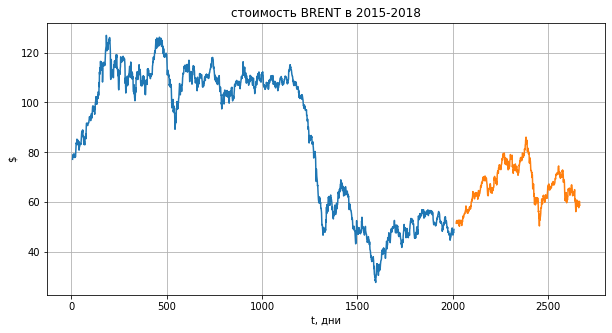

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data.index[x_len:y_train.shape[0]+x_len],y_train[:])
plt.plot(data.index[y_train.shape[0]+x_len+bias+future:],y_val[:])
plt.grid('on')
plt.xlabel('t, дни')
plt.ylabel('$')
plt.title('стоимость BRENT в 2015-2018')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

dataset_train = timeseries_dataset_from_array(
    X_train,
    y_train,
    sequence_length=x_len,
    sampling_rate=1,
    batch_size=batch_size,
)

dataset_val = timeseries_dataset_from_array(
    X_val,
    y_val,
    sequence_length=x_len,
    sampling_rate=1,
    batch_size=batch_size,
)

In [ ]:
for batch in dataset_train:
    inputs, targets = batch
    print("Input shape:", inputs.shape)
    print(inputs[1])
    print("Target shape:", targets.shape)
    print(targets[1])
    break

Input shape: (32, 7, 10)
tf.Tensor(
[[-1.7452388   0.72260267 -1.55813134  0.45266166  0.5925154   0.5707507
   0.27200661 -0.17281816 -0.16498899 -0.17586311]
 [-1.7452388   0.72260267 -1.44438667  0.45266166  0.60195592  0.5707507
   0.80745269 -0.17281816 -0.16498899 -0.17586311]
 [-1.7452388   0.72260267 -1.330642    0.45266166  0.61139644  0.5707507
   1.34289878 -0.17281816 -0.16498899 -0.17586311]
 [-1.7452388   0.72260267 -1.21689733  0.45266166  0.62083696  0.5707507
   1.87834486 -0.17281816  6.06101056 -0.17586311]
 [-1.7452388   0.72260267 -1.10315266  0.45266166  0.63027748  0.63692085
  -1.33433164  5.78642883 -0.16498899 -0.17586311]
 [-1.7452388   0.72260267 -0.989408    0.45266166  0.63971801  0.63692085
  -0.79888556 -0.17281816 -0.16498899  5.6862407 ]
 [-1.7452388   0.72260267 -0.87566333  0.45266166  0.64915853  0.63692085
  -0.26343947 -0.17281816 -0.16498899 -0.17586311]], shape=(7, 10), dtype=float64)
Target shape: (32,)
tf.Tensor(78.41, shape=(), dtype=float64)

**сеть:  LSTM слои + Conv1D + Dense слой**

In [ ]:
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D

early_stop = EarlyStopping(monitor='val_mae', patience=5)


model = Sequential()

model.add(LSTM(32, input_shape=(inputs.shape[1], inputs.shape[2]),
               return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(Conv1D(64, 3, activation='linear'))
model.add(Conv1D(64, 1, activation='linear'))
model.add(Flatten())
model.add(Dense(3, activation='linear'))
model.add(Dense(1, activation='linear'))


model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 7, 32)             5504      
                                                                 
 lstm_20 (LSTM)              (None, 7, 32)             8320      
                                                                 
 conv1d_2 (Conv1D)           (None, 5, 64)             6208      
                                                                 
 conv1d_3 (Conv1D)           (None, 5, 64)             4160      
                                                                 
 flatten_1 (Flatten)         (None, 320)               0         
                                                                 
 dense_26 (Dense)            (None, 3)                 963       
                                                                 
 dense_27 (Dense)            (None, 1)               

In [ ]:
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    callbacks=[early_stop])

Epoch 1/10
63/63 [==============================] - 5s 24ms/step - loss: 6694.6855 - mae: 72.5727 - val_loss: 2773.1558 - val_mae: 47.0938
Epoch 2/10
63/63 [==============================] - 1s 12ms/step - loss: 1852.1105 - mae: 33.7936 - val_loss: 1964.3822 - val_mae: 42.0182
Epoch 3/10
63/63 [==============================] - 1s 12ms/step - loss: 379.9069 - mae: 15.7532 - val_loss: 2155.8596 - val_mae: 44.5097
Epoch 4/10
63/63 [==============================] - 1s 12ms/step - loss: 350.3526 - mae: 15.2015 - val_loss: 2098.4026 - val_mae: 44.1897
Epoch 5/10
63/63 [==============================] - 1s 12ms/step - loss: 333.4243 - mae: 14.9091 - val_loss: 2000.8412 - val_mae: 43.3138
Epoch 6/10
63/63 [==============================] - 1s 12ms/step - loss: 332.1011 - mae: 14.9579 - val_loss: 1893.3433 - val_mae: 42.2321
Epoch 7/10
63/63 [==============================] - 1s 12ms/step - loss: 341.3814 - mae: 15.2089 - val_loss: 1783.0206 - val_mae: 41.0346
Epoch 8/10
63/63 [==============

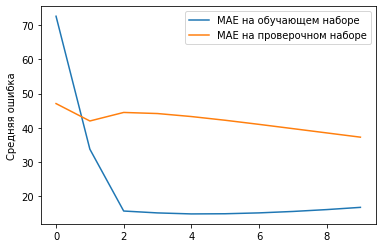

In [ ]:
plt.plot(history.history['mae'][:], 
         label='MAE на обучающем наборе')
plt.plot(history.history['val_mae'][:], 
         label='MAE на проверочном наборе')

plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
hist_val = history.history['val_mae']
hist_train = history.history['mae']

Epoch 1/10
63/63 [==============================] - 1s 12ms/step - loss: 478.3189 - mae: 17.5874 - val_loss: 1376.4736 - val_mae: 36.0141
Epoch 2/10
63/63 [==============================] - 1s 12ms/step - loss: 536.4901 - mae: 18.4852 - val_loss: 1274.2079 - val_mae: 34.6007
Epoch 3/10
63/63 [==============================] - 1s 12ms/step - loss: 607.3398 - mae: 19.5366 - val_loss: 1158.5336 - val_mae: 32.9209
Epoch 4/10
63/63 [==============================] - 1s 12ms/step - loss: 692.0950 - mae: 20.7994 - val_loss: 1021.8655 - val_mae: 30.8131
Epoch 5/10
63/63 [==============================] - 1s 12ms/step - loss: 782.8024 - mae: 22.2003 - val_loss: 861.6918 - val_mae: 28.1406
Epoch 6/10
63/63 [==============================] - 1s 12ms/step - loss: 849.5865 - mae: 23.0252 - val_loss: 689.2744 - val_mae: 24.9465
Epoch 7/10
63/63 [==============================] - 1s 12ms/step - loss: 845.9973 - mae: 22.4109 - val_loss: 539.2248 - val_mae: 21.7857
Epoch 8/10
63/63 [===================

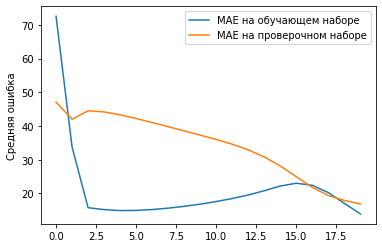

In [ ]:
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    callbacks=[early_stop])

hist_val.extend(history.history['val_mae'][:])
hist_train.extend(history.history['mae'][:])


plt.plot(hist_train, 
         label='MAE на обучающем наборе')
plt.plot(hist_val, 
         label='MAE на проверочном наборе')

plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

Проверяем результаты:

- строим предсказание
- рисуем прогноз для тестовой части 
- рисуем прогноз по тренировочной части

In [ ]:
pred = model.predict(dataset_train).flatten()
pred_val = model.predict(dataset_val).flatten()

21/21 [==============================] - 0s 6ms/step


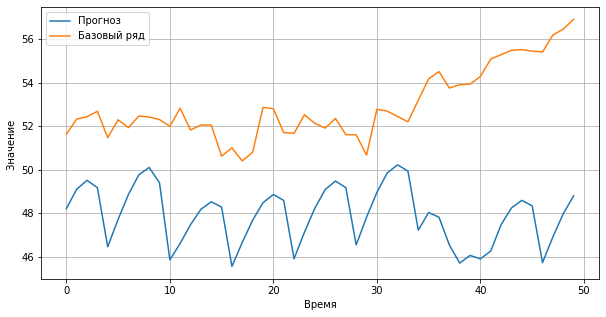

In [ ]:
start = 0
step = 50
plt.figure(figsize=(10, 5))
plt.grid('on')
plt.plot(pred_val[future + start: future + start + step], 
         label='Прогноз')
plt.plot(y_val.flatten()[start: start+step], 
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение ')

plt.legend()
plt.show()

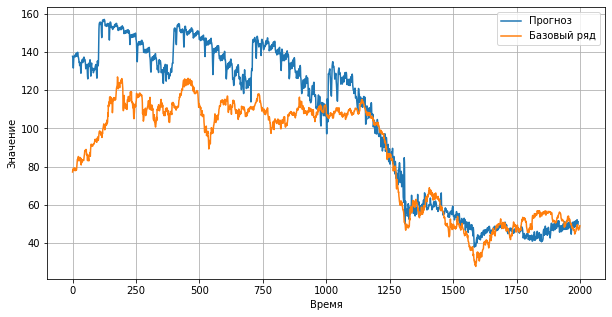

In [ ]:
start = 0

plt.figure(figsize=(10, 5))
plt.grid('on')
plt.plot(pred[future + start: future + train_size], 
         label='Прогноз')
plt.plot(y_train.flatten()[start: train_size], 
         label='Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

### Генерация текста

#### Cонеты Шекспира

In [ ]:
# Читаем текст
data = open('data/sonnets.txt').read()
corpus = data.lower().split("\n")
corpus[:10]

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,',
 "feed'st thy light'st flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thyself thy foe, to thy sweet self too cruel.',
 "thou that art now the world's fresh ornament",
 'and only herald to the gaudy spring,']

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


# Создаем объект для токенизации
total_words = 1000
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(corpus)

# tokenizer.index_word

Исполним токенизацию и кодирование

In [ ]:
print(corpus[0])
print(tokenizer.texts_to_sequences([corpus[0]]))
print(tokenizer.word_index['from'], tokenizer.word_index['fairest'])

from fairest creatures we desire increase,
[[34, 417, 877, 166, 213, 517]]
34 417


In [ ]:
# создадим последовательность токенов
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		sequence = token_list[:i+1]
		input_sequences.append(sequence)
input_sequences[:10]

[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517],
 [8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156]]

In [ ]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[:10]

11


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  34, 417],
       [  0,   0,   0,   0,   0,   0,   0,   0,  34, 417, 877],
       [  0,   0,   0,   0,   0,   0,   0,  34, 417, 877, 166],
       [  0,   0,   0,   0,   0,   0,  34, 417, 877, 166, 213],
       [  0,   0,   0,   0,   0,  34, 417, 877, 166, 213, 517],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   8, 878],
       [  0,   0,   0,   0,   0,   0,   0,   0,   8, 878, 134],
       [  0,   0,   0,   0,   0,   0,   0,   8, 878, 134, 351],
       [  0,   0,   0,   0,   0,   0,   8, 878, 134, 351, 102],
       [  0,   0,   0,   0,   0,   8, 878, 134, 351, 102, 156]],
      dtype=int32)

In [ ]:
predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

label = to_categorical(label, num_classes=total_words)
label.shape

(12880, 1000)

In [ ]:
predictors[0], np.argmax(label[0])

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34], dtype=int32), 417)

Создаем сеть

In [ ]:
from keras.layers import Dropout, Bidirectional
from keras import regularizers
from tensorflow.keras.optimizers import Adam


early_stop = EarlyStopping(monitor='val_loss', patience=10)

model = Sequential()
model.add(Embedding(input_dim=total_words,
                    output_dim=512,
                    input_length=max_sequence_len-1))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Bidirectional(LSTM(512, return_sequences=True)))
model.add(LSTM(1024))
model.add(Dropout(0.2))
model.add(Dense(total_words * 2 , activation='relu'))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 10, 512)           512000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 10, 512)          1574912   
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 10, 1024)         4198400   
 nal)                                                            
                                                                 
 lstm_29 (LSTM)              (None, 1024)              8392704   
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_32 (Dense)            (None, 2000)            

In [ ]:
history = model.fit(predictors, label,
                    epochs=100,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
322/322 [==============================] - 14s 28ms/step - loss: 5.9983 - accuracy: 0.0289 - val_loss: 5.9107 - val_accuracy: 0.0326
Epoch 2/100
322/322 [==============================] - 7s 23ms/step - loss: 5.7399 - accuracy: 0.0355 - val_loss: 5.8840 - val_accuracy: 0.0280
Epoch 3/100
322/322 [==============================] - 7s 23ms/step - loss: 5.6189 - accuracy: 0.0414 - val_loss: 5.8708 - val_accuracy: 0.0404
Epoch 4/100
322/322 [==============================] - 7s 23ms/step - loss: 5.4983 - accuracy: 0.0455 - val_loss: 5.8924 - val_accuracy: 0.0384
Epoch 5/100
322/322 [==============================] - 7s 23ms/step - loss: 5.3537 - accuracy: 0.0557 - val_loss: 5.9324 - val_accuracy: 0.0435
Epoch 6/100
322/322 [==============================] - 7s 23ms/step - loss: 5.2187 - accuracy: 0.0661 - val_loss: 6.0445 - val_accuracy: 0.0404
Epoch 7/100
322/322 [==============================] - 7s 23ms/step - loss: 5.0610 - accuracy: 0.0719 - val_loss: 6.1438 - val_accuracy

Тест


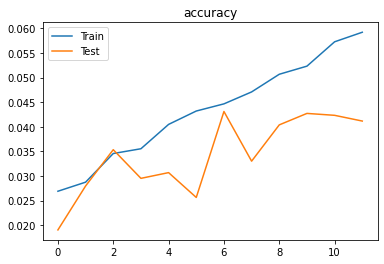

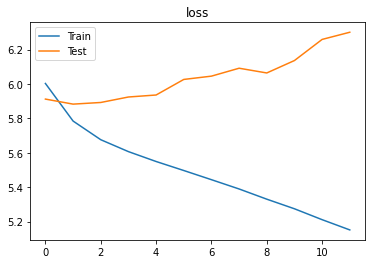

In [ ]:
acc = history.history['accuracy']
acc_v = history.history['val_accuracy']
loss = history.history['loss']
loss_v = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train')
plt.plot(epochs, acc_v, label='Test')
plt.legend()
plt.title('accuracy')

plt.figure()

plt.plot(epochs, loss, label='Train')
plt.plot(epochs, loss_v, label='Test')
plt.title('loss')
plt.legend()

plt.show()

Строим тест генератора

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
# seed_text = "She is my girl, I see in my hend"
next_words = 10
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_proba = model.predict(token_list, verbose=0)
    predicted_classes = np.argmax(predicted_proba, axis=1)

    output_word = tokenizer.index_word[predicted_classes[0]]
    seed_text += " " + output_word
    
print(seed_text)

[591, 18, 5, 352, 393]
[591, 18, 5, 352, 393, 5]
[591, 18, 5, 352, 393, 5, 14]
[591, 18, 5, 352, 393, 5, 14, 1]
[591, 18, 5, 352, 393, 5, 14, 1, 813]
[591, 18, 5, 352, 393, 5, 14, 1, 813, 11]
[591, 18, 5, 352, 393, 5, 14, 1, 813, 11, 18]
[591, 18, 5, 352, 393, 5, 14, 1, 813, 11, 18, 131]
[591, 18, 5, 352, 393, 5, 14, 1, 813, 11, 18, 131, 4]
[591, 18, 5, 352, 393, 5, 14, 1, 813, 11, 18, 131, 4, 18]
Help me Obi Wan Kenobi, you're my only hope my love and crown'd with me alone of me so


In [ ]:
predicted_proba

array([[1.58684090e-11, 1.11942856e-04, 4.87285201e-03, 1.52559939e-03,
        7.43244076e-04, 3.61876038e-04, 2.90796197e-05, 6.52365910e-04,
        1.30900298e-04, 9.06720350e-04, 1.02528161e-03, 2.76098988e-04,
        3.33710428e-04, 9.65977786e-04, 1.08184793e-03, 2.13109073e-03,
        2.07965821e-03, 4.73590195e-03, 1.48139894e-04, 1.05479546e-03,
        3.51283103e-01, 1.04580866e-03, 1.14458526e-05, 9.27869914e-05,
        1.00968464e-03, 9.61493515e-06, 1.83114048e-06, 1.51784807e-05,
        9.13460087e-03, 2.14667052e-05, 2.18128139e-06, 2.54214887e-04,
        3.27540038e-04, 4.34627844e-04, 5.15058200e-05, 1.64419785e-03,
        1.59157818e-04, 1.21887308e-03, 3.50664021e-04, 7.16671348e-05,
        2.36803862e-06, 5.96547907e-04, 3.89085093e-04, 8.61632545e-03,
        4.15223232e-03, 1.02223639e-05, 3.65991233e-04, 8.26352916e-05,
        1.64504472e-05, 2.91149736e-05, 3.24193068e-04, 7.14968053e-07,
        4.78412444e-03, 3.72402137e-05, 1.01500947e-04, 2.488898

## Практическое задание
1. Попробуйте обучить нейронную сеть RNN/LSTM/GRU на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). 

2. Опишите, какой результат вы получили? Что помогло вам улучшить ее точность?

https://drive.google.com/file/d/1xwXieDVy1RKdfiJ6am_nNWp6XhAYdhNb

In [ ]:
pd.read_csv('data/airline-passengers.csv')

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Дополнительные материалы

1. [Оригинальная научная статья по LSTM](https://www.bioinf.jku.at/publications/older/2604.pdf)
2. [Оригинальная научная статья по GRU](https://arxiv.org/abs/1406.1078)
3. [Введение в RNN Рекуррентные Нейронные Сети для начинающих](https://python-scripts.com/recurrent-neural-network)
4. [Введение в RNN](https://youtu.be/EBP3pqPeN8I)
5. [Simple LSTM](https://nicodjimenez.github.io/2014/08/08/lstm.html)
6. [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
7. [Illustrated Guide to LSTM's and GRU's: A step by step explanation](https://youtu.be/8HyCNIVRbSU)


## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Николенко, Кадурин, Архангельская: Глубокое обучение. Погружение в мир нейронных сетей 2018</li>
    <li>Aurélien Géron - Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2019</li>
    <li>https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</li>
    <li>https://github.com/llSourcell/recurrent_neural_net_demo</li>
    
</ol>

## Определения

**Рекуррентные нейронные сети (Recurrent neural network, RNN)** — вид нейронных сетей, где связи между элементами образуют направленную последовательность. Благодаря этому появляется возможность обрабатывать серии событий во времени или последовательные пространственные цепочки.

**Долгая краткосрочная память (Long short-term memory, LSTM)** — разновидность архитектуры рекуррентных нейронных сетей, предложенная в 1997 году Зеппом Хохрайтером и Юргеном Шмидхубером. В отличие от традиционных рекуррентных нейронных сетей, LSTM-сеть хорошо приспособлена к обучению на задачах классификации, обработки и прогнозирования временных рядов в случаях, когда важные события разделены временными лагами с неопределённой продолжительностью и границами.

**Управляемые рекуррентные блоки (Gated Recurrent Units, GRU)** — механизм gate'ов для рекуррентных нейронных сетей, представленный в 2014 году. Было установлено, что его эффективность при решении задач моделирования музыкальных и речевых сигналов сопоставима с использованием долгой краткосрочной памяти (LSTM). По сравнению с LSTM у данного механизма меньше параметров, т.к. отсутствует выходной gate.

**RNN, LSTM, GRU**
<!-- <img src='https://www.mdpi.com/energies/energies-13-00147/article_deploy/html/images/energies-13-00147-g008.png'> -->
<img src='images/rnnlstmgru.png' width=500>


**Механизм внимания (Attention)** — техника используемая в рекуррентных нейронных сетях (сокр. RNN) и сверточных нейронных сетях (сокр. CNN) для поиска взаимосвязей между различными частями входных и выходных данных.

<!-- <img src='https://drive.google.com/uc?export=view&id=1a72Ake6Ai2SdkZ9cQpqmq6-ebjblcQ34' width=450> -->
<img src='images/rel1.png' width=450>

**Bidirectional LSTM**

Двунаправленные рекуррентные нейронные сети (BRNN) соединяют два скрытых слоя противоположных направлений с одним и тем же выходом. При такой форме генеративного глубокого обучения выходной слой может получать информацию из прошлого (назад) и будущего (вперед) состояний одновременно.


<!-- <img src='https://drive.google.com/uc?export=view&id=1kCGsUWhUjIoIAquvE7FjaAbYjAQdsyW7' width=550> -->
<img src='images/bilstm1.png' width=550>

**Эмбэддинг** - векторное представление слов!

---